<h1 align="center">ANÁLISE DE DADOS DE SUICÍDIO NO BRASIL</h1>
<h4 align="center">Entre os anos de 2000 à 2015</h4>

<div align="center">

<strong>Autores</strong><br>

Bruna Larissa Clemente Gomes <br>
Renato Pedra Passos 

<br>

<strong>Professor Orientador</strong><br>

Fernando Masanori Ashikaga

</div>

--------------------------------------------------------------------------------

<h3 align="center"> Disclaimer / Aviso Legal ⚠️</h3>
<p align="center">Este notebook tem um fim único e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos.
Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.</p>


--------------------------------------------------------------------------

Análise da taxa de suicidio no Brasil
--------------------------------------------------------

#### 🔹 Atividades na primeira semana
- ✔ Importação das bibliotecas que serão utilizadas
- ✔ Importação do primeiro DataSet 'suicidio 2016'
- ✔ Análise do tamanho do arquivo (Linhas x Colunas)
- ✔ Análise de informações detalhadas da tabela
- ✔ Limpeza dos dados: deixar apenas o que vai ser utilizado



---


<h2 align="center">Importação das Bibliotecas 📥<h2>

In [37]:
# Importando bibiotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import pandas.util.testing as tm

In [2]:
# Alterando a visualização do tamanho da tabela
pd.set_option("display.max_rows", 400)



---



<h2 align="center">Importando o primeiro DataSet com dados dos anos de 1987 - 2015</h2>

In [3]:
# Importando o DataSet de dados com os casos de Covid-19
dados_mundiais = pd.read_csv('https://gist.githubusercontent.com/littlebru/c14170c16839c58ce3ab939cc2dba675/raw/354afe9457639a8fe4d9d60253997a6284cd7a01/suicide_1987-2016.csv')

In [4]:
# 5 primeiras linhas do primeiro DataSet
dados_mundiais.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


-----------------------------------------------

<h1 align="center">Informações detalhadas do DataSet 🧾</h1>

Nos códigos abaixo, eu vou estar extraindo informações do tipo:
- Total de linhas e colunas do dataset
- Tipos de dados existentes
- Listagem de todas as colunas
- Verificação da existência de dados NAN (Not a Number)

<h4 align="center"><strong>DataSet 1</strong></h4>


In [5]:
# Total de linhas X colunas
dados_mundiais.shape

(27820, 12)

In [6]:
# Listando os nomes das colunas
list(dados_mundiais.columns)

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

In [7]:
# Visualizando o tipo das informações em cada coluna
dados_mundiais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
# Exibindo a descrição dos dados e alterando as linhas em colunas e colunas em linhas
dados_mundiais.describe().T

,count,mean,std,min,25%,50%,75%,max
year,27820.0,2.001258e+03,8.469055e+00,1985.000,1995.000,2002.000,2008.000,2.016000e+03
suicides_no,27820.0,2.425744e+02,9.020479e+02,0.000,3.000,25.000,131.000,2.233800e+04
population,27820.0,1.844794e+06,3.911779e+06,278.000,97498.500,430150.000,1486143.250,4.380521e+07
suicides/100k pop,27820.0,1.281610e+01,1.896151e+01,0.000,0.920,5.990,16.620,2.249700e+02
HDI for year,8364.0,7.766011e-01,9.336671e-02,0.483,0.713,0.779,0.855,9.440000e-01
gdp_per_capita ($),27820.0,1.686646e+04,1.888758e+04,251.000,3447.000,9372.000,24874.000,1.263520e+05


In [9]:
# Fazendo uma transposição dos dados e ordenação pela média
dados_mundiais.describe().sort_values(by='mean', axis= 1).T

,count,mean,std,min,25%,50%,75%,max
HDI for year,8364.0,7.766011e-01,9.336671e-02,0.483,0.713,0.779,0.855,9.440000e-01
suicides/100k pop,27820.0,1.281610e+01,1.896151e+01,0.000,0.920,5.990,16.620,2.249700e+02
suicides_no,27820.0,2.425744e+02,9.020479e+02,0.000,3.000,25.000,131.000,2.233800e+04
year,27820.0,2.001258e+03,8.469055e+00,1985.000,1995.000,2002.000,2008.000,2.016000e+03
gdp_per_capita ($),27820.0,1.686646e+04,1.888758e+04,251.000,3447.000,9372.000,24874.000,1.263520e+05
population,27820.0,1.844794e+06,3.911779e+06,278.000,97498.500,430150.000,1486143.250,4.380521e+07


In [10]:
# Verificando a existencia de dados nulos
dados_mundiais.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64



---



<h1 align="center">Limpando os Dados do primeiro DataSet 🧼</h1>

Abaixo eu vou estar realizando uma "limpeza" nos dados, como:
- Renomeando colunas
- Tratando valores nulos
- Removendo linhas e colunas que não serão utilizadas na análise
- Criação de DataFrames que serão utilizados nos gráficos

In [11]:
# Renomeando as Colunas
dados_mundiais.rename(columns={'country': 'país', 'year':'ano', 'sex':'genero', 'age': 'idade', 'suicides_no':'numero_de_suicidios', 'population':'população', 'HDI for year':'IDH por ano'}, inplace=True)

In [12]:
# Removendo colunas que não serão utilizadas na análise
dados_mundiais = dados_mundiais.drop(columns={'suicides/100k pop', 'country-year',' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation', 'IDH por ano'})

In [13]:
dados_br = pd.DataFrame(dados_mundiais[dados_mundiais.país == 'Brazil'])

In [14]:
# Verificando a quantidade de dados nulos
dados_br.isna().sum()

país                   0
ano                    0
genero                 0
idade                  0
numero_de_suicidios    0
população              0
dtype: int64

In [15]:
dados_br.head()

,país,ano,genero,idade,numero_de_suicidios,população
4172,Brazil,1985,male,75+ years,129,840300
4173,Brazil,1985,male,55-74 years,535,5364900
4174,Brazil,1985,male,35-54 years,1011,11986300
4175,Brazil,1985,male,25-34 years,791,10762900
4176,Brazil,1985,male,15-24 years,661,13834000


In [ ]:
dados_br.replace()


---



<h1 align="center">Visualização dos dados 🎨</h1>

Abaixo estão algumas visualizações dos dados, como:
- Maior numero de suicidios
- Menor numero de suicidios
- Mapa de cores do numero de suicidios


As tabelas abaixo estão com os dados destacados, rode este notebook no seu [Jupyter Notebook](https://jupyter.org/install) ou no [Google Colab](https://colab.research.google.com/drive/1vOTB97qc-QaD1w3OC0RiqBpC1bxWz4qW?usp=sharing), assim vai ser possível visualizar esses destaques feitos 😉

In [16]:
# Utilizando mapa de cores para visualizar os maiores e menores valores nos numeros de suicidios
dados_br.tail(20).style.background_gradient(subset=['numero_de_suicidios'], cmap='cool')

,país,ano,genero,idade,numero_de_suicidios,população
4524,Brazil,2014,male,15-24 years,1358,17606681
4525,Brazil,2014,female,35-54 years,871,27971096
4526,Brazil,2014,female,55-74 years,389,14550395
4527,Brazil,2014,female,25-34 years,457,17539955
4528,Brazil,2014,female,75+ years,83,3634999
4529,Brazil,2014,female,15-24 years,371,17094729
4530,Brazil,2014,male,5-14 years,84,16299015
4531,Brazil,2014,female,5-14 years,62,15670559
4532,Brazil,2015,male,75+ years,470,2448560
4533,Brazil,2015,male,55-74 years,1693,12987357


<h4 align="center">Suicidio entre Homens🙎‍♂️ e Mulheres 🙎 </h4>

In [17]:
# Criando DataFrames de Mulheres e Homens

dados_homens_brasileiros = pd.DataFrame(dados_br.query('genero == "male"'))

dados_mulheres_brasileiras = pd.DataFrame(dados_br.query('genero == "female"'))

In [18]:
# Maior taxa de mortes entre homens
dados_homens_brasileiros.tail(20).style.highlight_max(subset="numero_de_suicidios", color="#f76773")

,país,ano,genero,idade,numero_de_suicidios,população
4500,Brazil,2012,male,15-24 years,1313,17644319
4506,Brazil,2012,male,5-14 years,79,16810876
4508,Brazil,2013,male,75+ years,370,2240434
4509,Brazil,2013,male,55-74 years,1474,12036068
4510,Brazil,2013,male,35-54 years,3053,25965164
4511,Brazil,2013,male,25-34 years,2004,17534209
4512,Brazil,2013,male,15-24 years,1317,17627508
4518,Brazil,2013,male,5-14 years,72,16555477
4520,Brazil,2014,male,75+ years,390,2349303
4521,Brazil,2014,male,55-74 years,1534,12492114


In [19]:
# Menor taxa de mortes entre homens
dados_homens_brasileiros.head(20).style.highlight_min(subset="numero_de_suicidios", color="#3cd0e0")

,país,ano,genero,idade,numero_de_suicidios,população
4172,Brazil,1985,male,75+ years,129,840300
4173,Brazil,1985,male,55-74 years,535,5364900
4174,Brazil,1985,male,35-54 years,1011,11986300
4175,Brazil,1985,male,25-34 years,791,10762900
4176,Brazil,1985,male,15-24 years,661,13834000
4183,Brazil,1985,male,5-14 years,35,15693700
4184,Brazil,1986,male,75+ years,103,823700
4185,Brazil,1986,male,55-74 years,581,5492100
4186,Brazil,1986,male,35-54 years,967,12396000
4187,Brazil,1986,male,25-34 years,754,9895200


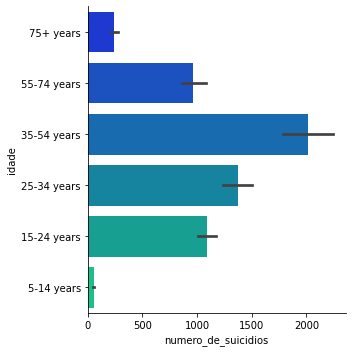

In [47]:
sns.catplot(x="numero_de_suicidios", y="idade",palette='winter', kind='bar',
           data=dados_homens_brasileiros)

In [48]:
# Maior taxa de mortes entre mulheres
dados_mulheres_brasileiras.tail(20).style.highlight_max(subset="numero_de_suicidios", color="#f76773")

,país,ano,genero,idade,numero_de_suicidios,população
4505,Brazil,2012,female,15-24 years,383,17145894
4507,Brazil,2012,female,5-14 years,41,16175024
4513,Brazil,2013,female,35-54 years,897,27475364
4514,Brazil,2013,female,55-74 years,433,14022927
4515,Brazil,2013,female,75+ years,88,3462431
4516,Brazil,2013,female,25-34 years,393,17492228
4517,Brazil,2013,female,15-24 years,362,17123318
4519,Brazil,2013,female,5-14 years,50,15923724
4525,Brazil,2014,female,35-54 years,871,27971096
4526,Brazil,2014,female,55-74 years,389,14550395


In [49]:
# Menor taxa de mortes entre mulheres
dados_mulheres_brasileiras.head(25).query('genero == "female"').style.highlight_min(subset="numero_de_suicidios", color="#3cd0e0")

,país,ano,genero,idade,numero_de_suicidios,população
4177,Brazil,1985,female,75+ years,32,988100
4178,Brazil,1985,female,55-74 years,148,5650100
4179,Brazil,1985,female,25-34 years,269,10798700
4180,Brazil,1985,female,35-54 years,296,12185200
4181,Brazil,1985,female,15-24 years,280,13751800
4182,Brazil,1985,female,5-14 years,41,15622900
4189,Brazil,1986,female,75+ years,33,1079400
4190,Brazil,1986,female,55-74 years,163,6093600
4191,Brazil,1986,female,35-54 years,335,13195700
4192,Brazil,1986,female,15-24 years,331,13514000


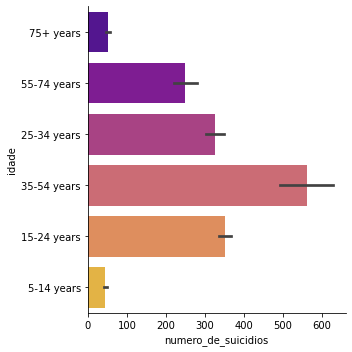

In [33]:
sns.catplot(x="numero_de_suicidios", y="idade",palette='plasma', kind='bar',
           data= dados_mulheres_brasileiras)